### 공공데이터 API
- 제공하는 지자체, 정부부터마다 접근 url이 상이함
    - 데이터별로 필요 내용 확인
    - 요청 변수 확인 후 사용 

### 국립 중앙 의료원 제공 전국 약국정보 data
- 연결 url : http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire

In [1]:
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
endpoint='http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire'
servicekey='azOlzHmE12kpPv%2F6L9CM1ylcu%2Bfqgba5RR%2Fxip8K1OQuncWE3OGzAW5hiE2oKb6fbaMFwkSf8YGy1sytUI5feA%3D%3D'

In [5]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '1' # 약국 영업 요일 전달
QN = quote('삼성약국') # 검색하고자하는 약국의 이름(부분)
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
ORD = 'NAME' # 정렬기준
numOfRows = '10' # 추출 data 수

In [7]:
paramset = '?servicekey='+servicekey + \
           '&QT='+QT + \
           '&QN='+QN + \
           '&Q0='+Q0 + \
           '&Q1='+Q1 + \
           '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=azOlzHmE12kpPv%2F6L9CM1ylcu%2Bfqgba5RR%2Fxip8K1OQuncWE3OGzAW5hiE2oKb6fbaMFwkSf8YGy1sytUI5feA%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [9]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?servicekey=azOlzHmE12kpPv%2F6L9CM1ylcu%2Bfqgba5RR%2Fxip8K1OQuncWE3OGzAW5hiE2oKb6fbaMFwkSf8YGy1sytUI5feA%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [10]:
result=requests.get(url)
bs_obj=BeautifulSoup(result.content,'html.parser')
bs_obj

/usr/local/lib/python3.8/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><dutyaddr>서울특별시 강남구 일원로 53 (일원동) </dutyaddr><dutymapimg>소림빌딩 1층</dutymapimg><dutyname>E-삼성약국</dutyname><dutytel1>02-3412-1254</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>1900</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>1900</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104799</hpid><postcdn1>063</postcdn1><postcdn2>43 </postcdn2><rnum>1</rnum><wgs84lat>37.48926299528938</wgs84lat><wgs84lon>127.08181088280385</wgs84lon></item><item><dutyaddr>서울특별시 강남구 일원로 45, 대훈빌딩 1층 (일원동)</dutyaddr><dutymapimg>대청역 4번출구에서 423m</dutymapimg><dutyname>무지개삼성약국</dutyname><dutytel1>02-2226-5467</dutytel1><dutytime1c>1900</dutyti

In [16]:
len(bs_obj.findAll('item'))
bs_obj.findAll('item')[0].dutyname.text

'E-삼성약국'

In [18]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
QT = '1' # 약국 영업 요일 전달
QN = quote('삼성약국') # 검색하고자하는 약국의 이름(부분)
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
ORD = 'NAME' # 정렬기준
numOfRows = '6000' # 추출 data 수

### 서울시의 모든 약국 정보 추출

In [24]:
paramset = '?servicekey='+servicekey + \
           '&Q0='+Q0 + \
           '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=azOlzHmE12kpPv%2F6L9CM1ylcu%2Bfqgba5RR%2Fxip8K1OQuncWE3OGzAW5hiE2oKb6fbaMFwkSf8YGy1sytUI5feA%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [25]:
url = endpoint + paramset

In [26]:
res = requests.get(url)
bs_obj=BeautifulSoup(res.content,'html.parser')
res_fin = bs_obj.find_all('item')
len(res_fin)

5407

In [32]:
#[item.dutyname.text for item in res_fin]
#[item.dutyaddr.text for item in res_fin]
#[item.dutytel1.text for item in res_fin]

In [33]:
# 서울시의 약국정보 data df에 저장
name = [item.dutyname.text for item in res_fin]
addr = [item.dutyaddr.text for item in res_fin]
tel = [item.dutytel1.text for item in res_fin]

In [34]:
df_fin = pd.DataFrame({'약국명':name, '주소':addr, '전화번호':tel})
df_fin.tail()

,약국명,주소,전화번호
5402,힐스테이트솔약국,"서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)",02-2695-6121
5403,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114
5404,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588
5405,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221
5406,힘챤약국,서울특별시 성북구 보국문로 16-1,02-942-2088


In [35]:
df_fin.to_csv('crawl_data/서울시_약국정보.csv')

### 서울시 약국 중 월요일 야간에 운영하는 약국 정보
- 오후 9시 이후에 문을 닫는 약국

In [40]:
# 월요일 영업 종료시간이 21:00분 이후인지 확인하는 코드
# <dutyutime1c> 태그의 텍스트를 활용해서 조건 확인
int(res_fin[1].dutytime1c.text) > 2100

False

In [44]:
# 초기 변수 생성
name=[]
adr=[]
tel=[]
c_time_li=[]
count=0

In [45]:
for item in res_fin :
    tmp_time=item.find('dutytime1c') # 월요일 휴무인 약국은 태그가 없음
    if tmp_time != None :
        c_time=int(tmp_time.text)
        if c_time > 2100 :
            count=count+1
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            c_time_li.append(item.find('dutytime1c').text)

In [47]:
count
len(name), len(adr), len(tel), len(c_time_li)

(752, 752, 752, 752)

In [48]:
df_mon_night=pd.DataFrame({'약국명':name, '주소':adr, '전화번호':tel, '종료시간':c_time_li})
df_mon_night.tail()

,약국명,주소,전화번호,종료시간
747,휴베이스하이약국,"서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)",070-7778-8275,2200
748,휴베이스하이약국,"서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)",070-7798-8275,2200
749,흥명약국,서울특별시 동대문구 고산자로30길 56 (용두동),02-963-0617,2300
750,희망약국,"서울특별시 관악구 쑥고개로 53, 1층 (봉천동)",02-874-9488,2130
751,희망약국,"서울특별시 노원구 동일로230가길 15, 103호 (상계동, 우방아파트상가)",02-939-9831,2200


In [49]:
df_mon_night.to_csv('./crawl_data/서울시월요일심야영업약국정보.csv')

### 연습문제
- 슬랙으로 코드 제출
- 서울시에서 토요일이나 일요일에 영업하는 약국의 정보를 추출후 df 생성 저장
    - 약국명, 주소, 전화번호, 토요일영업여부, 일요일영업여부, 토요일종료시간, 일요일종료시간
    - 토요일/일요일영업여부값은 : Y/N
    - 서울시주말영업약국.csv 로 저장
- 서울시 각 구별로 약국의 수를 비교하는 막대그래프 생성

In [50]:
name=[]
adr=[]
tel=[]
sat=[]
sun=[]
sat_c=[]
sun_c=[]
count=0

In [51]:
for item in res_fin :
    st_item = item.find('dutytime6s')
    su_item = item.find('dutytime7s')
    
    if (st_item != None) and (su_item != None) :        
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            sat.append('y')
            sun.append('y')
            sat_c.append(item.find('dutytime6c').text)
            sun_c.append(item.find('dutytime7c').text)
    elif su_item != None :
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            sat.append('n')
            sun.append('y')
            sat_c.append('None')
            sun_c.append(item.find('dutytime7c').text)     
    elif st_item != None :
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            sat.append('y')
            sun.append('n')
            sat_c.append(item.find('dutytime6c').text)
            sun_c.append('None')

In [52]:
len(name),len(adr),len(tel),len(sat),len(sun),len(sat_c),len(sun_c)

(5210, 5210, 5210, 5210, 5210, 5210, 5210)

In [53]:
df_fin=pd.DataFrame({'약국명':name,'주소':adr, '전화번호':tel, '토요일영업여부':sat, 
                     '일요일영업여부':sun, '토요일종료시간':sat_c,'일요일종료시간':sun_c})

In [54]:
df_fin.head()

,약국명,주소,전화번호,토요일영업여부,일요일영업여부,토요일종료시간,일요일종료시간
0,100세건강약국,"서울특별시 강남구 헌릉로571길 7, 강남레체 1층 101호 (세곡동)",02-445-1460,y,n,1900,None
1,100세약국,"서울특별시 영등포구 양평로 24, (당산동6가)",02-2678-8217,y,n,1700,None
2,1898광장약국,"서울특별시 중구 명동길 74, 카톨릭회관 신관 B113호 (명동2가)",02-0000-0000,y,y,2000,2000
3,1번약국,서울특별시 관악구 남부순환로 1832 1층,02-872-7583,y,y,1700,1500
4,1번약국,"서울특별시 관악구 남부순환로 1832, 1층 1호 (봉천동)",02-882-7583,y,y,1700,1500


In [55]:
df_fin.tail()

,약국명,주소,전화번호,토요일영업여부,일요일영업여부,토요일종료시간,일요일종료시간
5205,힐스테이트솔약국,"서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)",02-2695-6121,y,y,1500,1400
5206,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114,y,y,1800,1800
5207,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588,y,n,1600,None
5208,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221,y,n,1500,None
5209,힘챤약국,서울특별시 성북구 보국문로 16-1,02-942-2088,y,n,1400,None


In [56]:
df_fin.to_csv('./crawl_data/서울시주말영업약국.csv')

In [59]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 48.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 31.2 MB/s eta 0:00:01


In [61]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [65]:
[f.fname for f in fm.fontManager.ttflist]

['/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',
 '/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [71]:
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

10.0
['sans-serif']


In [74]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams['font.size'] = 12.

Text(0.5, 1.0, '서울시 구별 약국수')

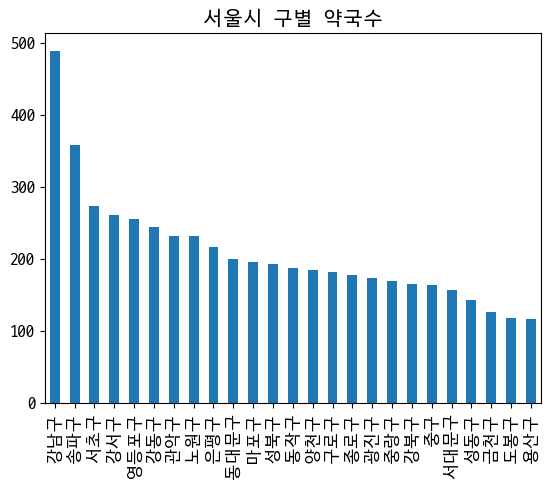

In [76]:
import matplotlib.pyplot as plt
tmp=[]
for v in df_fin['주소'].values :
    tmp.append(v.split(" ")[1])
pd.Series(tmp).value_counts().plot(kind='bar')
plt.title('서울시 구별 약국수')